In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

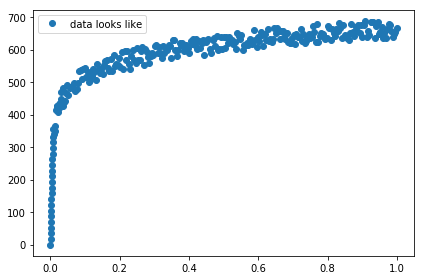

In [3]:
data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',')
X = data[:,:1]
y = data[:,1:2]

X = MinMaxScaler().fit_transform(X)

plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
#train model using decision tree
r2_ = 0.99
r2_train_ = 0.0
r2_test_ = 0.0
max_ = 0
while r2_test_ < float(r2_):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    
    dt_reg = DecisionTreeRegressor(max_depth=5)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_svr_ = dt_reg.predict(X_train)
    y_test_predicted_svr_ = dt_reg.predict(X_test)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr_))
    r2_train_ = r2_score(y_train, y_train_predicted_svr_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_svr_)
    # Evaluating test dataset
    rmse_test_ = np.sqrt(mean_squared_error(y_test, y_test_predicted_svr_))
    r2_test_ = r2_score(y_test, y_test_predicted_svr_)
    mae_test_ = mean_absolute_error(y_test, y_test_predicted_svr_)
    
    if r2_test_ > max_:
        max_ = r2_test_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_test_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(mae_test_))

R2 score of test is 0.9761421181231869
R2 score of test is 0.9823761272681796
R2 score of test is 0.9835356101600534
R2 score of test is 0.9859686593000179
R2 score of test is 0.9903466620987842
-------------------------------------------
RMSE of training is 15.035708373455858
R2 score of training  is 0.9821832580000168
MAE of training is 12.227936568360835
RMSE of test is 18.346235215359492
R2 score of test is 0.9903466620987842
MAE of test is 16.109358541005736


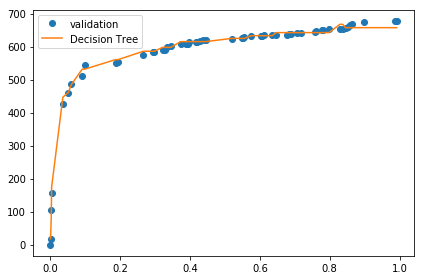

In [7]:
# dt_model_ = f"dt_model.pickle"
# print(f"Save model to file {dt_model_} ... ", end="")
# pickle.dump(dt_reg, open(dt_model_, "wb"))
# print("OK")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

X_test = np.sort(X_test, axis=0)
y_test = np.sort(y_test, axis=0)

y_pred_3 = dt_reg.predict(X_test)

plt.plot(X_test, y_test, 'o', label='validation')
plt.plot(X_test, y_pred_3, '-', label='Decision Tree')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# find max depth for model

max_depth_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

# TRAINING ERROR PER DEGREE
train_mae_errors = []
# TEST ERROR PER DEGREE
test_mae_errors = []

r2_ = 0.98
r2_train_ = 0.0
r2_test_ = 0.0
max_ = 0

for d in max_depth_:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
    
    dt_reg = DecisionTreeRegressor(max_depth=d)
    dt_reg.fit(X_train, y_train)
    
    y_train_predicted_svr_ = dt_reg.predict(X_train)
    y_test_predicted_svr_ = dt_reg.predict(X_test)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr_))
    r2_train_ = r2_score(y_train, y_train_predicted_svr_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_svr_)
    # Evaluating test dataset
    rmse_test_ = np.sqrt(mean_squared_error(y_test, y_test_predicted_svr_))
    r2_test_ = r2_score(y_test, y_test_predicted_svr_)
    mae_test_ = mean_absolute_error(y_test, y_test_predicted_svr_)
    
    print("R2 score of train is {}".format(r2_train_))
    print("R2 score of test is {}".format(r2_test_))
        
    train_mae_errors.append(mae_train_)
    test_mae_errors.append(mae_test_)

R2 score of train is 0.7038308825577638
R2 score of test is 0.761579021895932
R2 score of train is 0.9293745716476673
R2 score of test is 0.8709207488819113
R2 score of train is 0.9743360645302238
R2 score of test is 0.9585051907677694
R2 score of train is 0.9868564579729976
R2 score of test is 0.9683966499874079
R2 score of train is 0.9880755415300313
R2 score of test is 0.9782962813463931
R2 score of train is 0.9882049684097425
R2 score of test is 0.979283906544235
R2 score of train is 0.9935038490886162
R2 score of test is 0.9591600216921864
R2 score of train is 0.9948517784261073
R2 score of test is 0.9745811853227972
R2 score of train is 0.9965574168068164
R2 score of test is 0.9807783712416964
R2 score of train is 0.99866821834849
R2 score of test is 0.9431730323838524
R2 score of train is 0.9987391330299511
R2 score of test is 0.9779406442941444
R2 score of train is 0.9993371697907195
R2 score of test is 0.9713092012961989
R2 score of train is 0.9990796430650345
R2 score of test

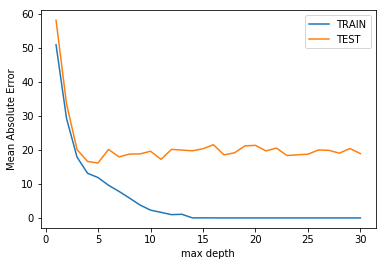

In [9]:
plt.plot(max_depth_, train_mae_errors,label='TRAIN')
plt.plot(max_depth_,test_mae_errors,label='TEST')
plt.xlabel("max depth")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()